In [81]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor, LocalOutlierFactor
from sklearn.cluster import DBSCAN, KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR, OneClassSVM
import scipy
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.feature_selection import VarianceThreshold
from tensorflow.keras import Input, Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
import numpy as np

In [3]:
df = pd.read_csv('CarsData.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
0,I10,2017,7495,Manual,11630,Petrol,145,60.1,1.0,hyundi
1,Polo,2017,10989,Manual,9200,Petrol,145,58.9,1.0,volkswagen
2,2 Series,2019,27990,Semi-Auto,1614,Diesel,145,49.6,2.0,BMW
3,Yeti Outdoor,2017,12495,Manual,30960,Diesel,150,62.8,2.0,skoda
4,Fiesta,2017,7999,Manual,19353,Petrol,125,54.3,1.2,ford


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97712 entries, 0 to 97711
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         97712 non-null  object 
 1   year          97712 non-null  int64  
 2   price         97712 non-null  int64  
 3   transmission  97712 non-null  object 
 4   mileage       97712 non-null  int64  
 5   fuelType      97712 non-null  object 
 6   tax           97712 non-null  int64  
 7   mpg           97712 non-null  float64
 8   engineSize    97712 non-null  float64
 9   Manufacturer  97712 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 7.5+ MB


In [5]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
Manufacturer    0
dtype: int64

In [6]:
df['model'].value_counts()

model
 Fiesta     6509
 Golf       4797
 Focus      4555
 C Class    3694
 Corsa      3285
            ... 
E Class        1
200            1
 Ranger        1
180            1
220            1
Name: count, Length: 196, dtype: int64

In [7]:
df['year'].value_counts()

year
2019    26165
2017    21616
2016    15724
2018    13570
2015     7586
2014     4053
2020     4040
2013     2590
2012      633
2011      432
2010      340
2009      277
2008      199
2007      163
2006       86
2005       69
2004       52
2003       34
2002       31
2001       20
2000        9
1998        8
1999        6
1997        4
1996        2
1970        2
2024        1
Name: count, dtype: int64

In [8]:
df['Manufacturer'].value_counts()

Manufacturer
ford          17811
volkswagen    14893
vauxhall      13258
merc          12860
BMW           10664
Audi          10565
toyota         6699
skoda          6188
hyundi         4774
Name: count, dtype: int64

In [9]:
df[(df['year'] < 2002)].sort_values(by = 'model', ascending=True).reset_index()

,index,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
0,50623,1 Series,2001,13000,Manual,22633,Petrol,125,53.3,0.0,BMW
1,96354,3 Series,2000,1550,Automatic,93000,Petrol,270,29.7,2.5,BMW
2,45678,3 Series,2001,3050,Automatic,90000,Petrol,325,27.7,3.0,BMW
3,22144,3 Series,1999,1200,Automatic,82000,Petrol,245,31.0,2.8,BMW
4,50998,5 Series,2000,1699,Manual,99209,Petrol,265,29.4,2.0,BMW
5,61962,5 Series,1996,5995,Automatic,36000,Petrol,270,26.4,2.8,BMW
6,3475,A3,1998,4999,Automatic,55000,Petrol,265,30.4,1.8,Audi
7,15557,A8,1997,4650,Automatic,122000,Petrol,265,18.9,4.2,Audi
8,75597,Accent,2000,1295,Automatic,47000,Petrol,150,38.7,1.3,hyundi
9,67360,Astra,1997,950,Manual,89233,Petrol,265,35.8,1.6,vauxhall


In [10]:
model_year_df = df.groupby(['year', 'model']).size().reset_index(name = 'count').sort_values(by = 'year', ascending=True)
model_year_df

,year,model,count
0,1970,M Class,1
1,1970,Zafira,1
2,1996,5 Series,1
3,1996,Escort,1
4,1997,A8,1
...,...,...,...
1526,2020,Combo Life,6
1525,2020,Caravelle,10
1524,2020,Camry,1
1536,2020,GLA Class,48


In [11]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,97712.000000,97712.000000,97712.000000,97712.000000,97712.000000,97712.000000
mean,2017.066502,16773.487555,23219.475499,120.142408,55.205623,1.664913
std,2.118661,9868.552222,21060.882301,63.357250,16.181659,0.558574
min,1970.000000,450.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,9999.000000,7673.000000,125.000000,47.100000,1.200000
50%,2017.000000,14470.000000,17682.500000,145.000000,54.300000,1.600000
75%,2019.000000,20750.000000,32500.000000,145.000000,62.800000,2.000000
max,2024.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000


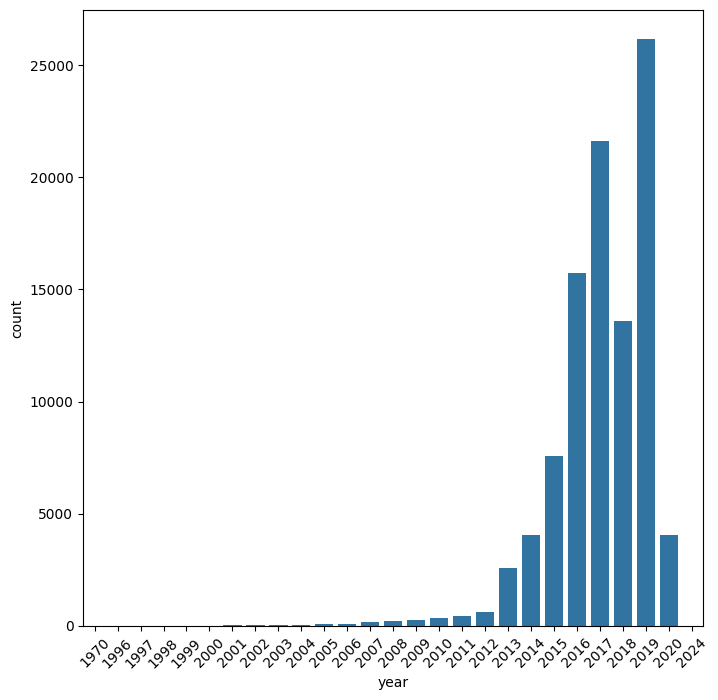

In [12]:
plt.figure(figsize=(8,8))
ax = sns.countplot(data = df, x = 'year')
plt.xticks(rotation = 45)
plt.show()

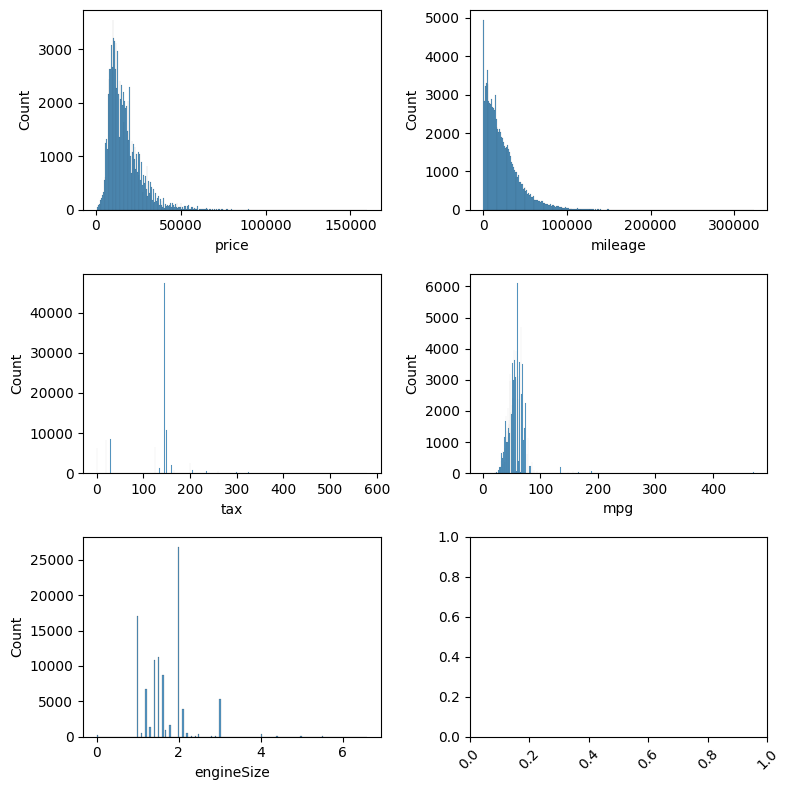

In [13]:
fig, axes = plt.subplots(3,2, figsize = (8,8))
axes = axes.flatten()

for i,column in enumerate(df.iloc[:,2:].select_dtypes(include = ['int64', 'float64']).columns):
    sns.histplot(df, x = f'{column}', ax=axes[i])
    plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()
    


In [14]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize', 'Manufacturer'],
      dtype='object')

transmission
Manual       55502
Semi-Auto    22296
Automatic    19905
Other            9
Name: count, dtype: int64


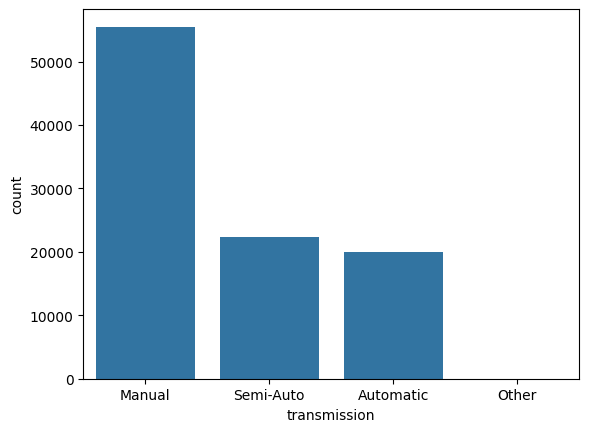

In [15]:
sns.countplot(df, x = 'transmission')
print(df['transmission'].value_counts())
plt.show()

In [16]:
df[(df['transmission']== 'Other')]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
11457,Mokka,2019,22499,Other,4500,Petrol,145,42.2,1.5,vauxhall
15221,Scala,2019,15999,Other,3500,Petrol,145,47.1,1.0,skoda
16356,GLA Class,2016,18700,Other,30895,Other,125,56.5,0.0,merc
38284,SLK,2015,12995,Other,39000,Diesel,150,56.5,2.1,merc
48193,Mokka,2019,13499,Other,3000,Petrol,145,44.8,1.4,vauxhall
49375,Ioniq,2017,12495,Other,27779,Hybrid,0,78.5,1.6,hyundi
59185,Yaris,2015,12795,Other,16733,Hybrid,0,78.0,1.5,toyota
66522,Mokka,2019,19995,Other,1450,Diesel,145,57.7,1.5,vauxhall
94860,Tucson,2017,16995,Other,25915,Petrol,145,39.8,1.6,hyundi


transmission
Manual       55502
Semi-Auto    22296
Automatic    19905
Other            9
Name: count, dtype: int64


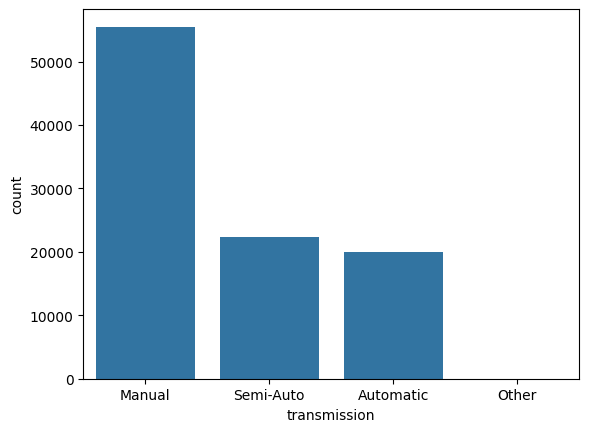

In [17]:
sns.countplot(df, x = 'transmission')
print(df['transmission'].value_counts())
plt.show()

fuelType
Petrol      53982
Diesel      40419
Hybrid       3059
Other         246
Electric        6
Name: count, dtype: int64


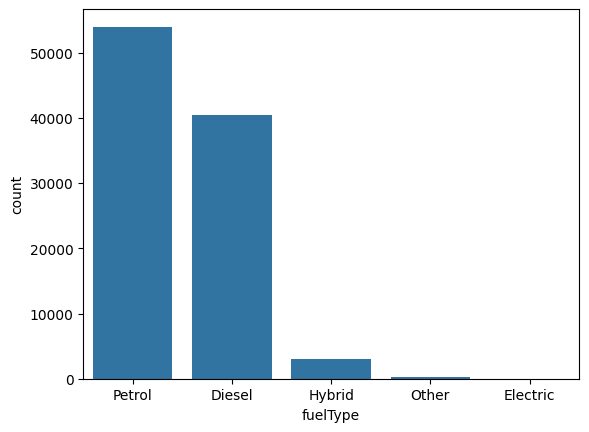

In [18]:
sns.countplot(df, x = 'fuelType')
print(df['fuelType'].value_counts())
plt.show()

In [19]:
df_other_electric = df[(df['fuelType']== 'Other') | (df['fuelType'] == 'Electric')]
df_other_electric.describe()

,year,price,mileage,tax,mpg,engineSize
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,2017.357143,17439.400794,21310.980159,101.706349,90.788095,1.500000
std,1.700547,8019.846705,19091.607000,69.428982,88.060851,0.526357
min,2008.000000,4995.000000,100.000000,0.000000,25.500000,0.000000
25%,2016.000000,10959.750000,6039.750000,0.000000,48.700000,1.000000
50%,2017.000000,16450.000000,14506.500000,145.000000,64.950000,1.500000
75%,2019.000000,21831.250000,30869.500000,145.000000,78.000000,2.000000
max,2020.000000,59995.000000,112000.000000,300.000000,470.800000,3.000000


Manufacturer
ford          17811
volkswagen    14893
vauxhall      13258
merc          12860
BMW           10664
Audi          10565
toyota         6699
skoda          6188
hyundi         4774
Name: count, dtype: int64


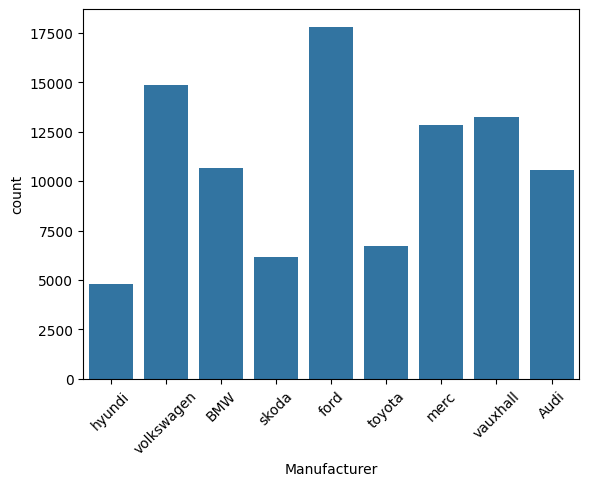

In [20]:
sns.countplot(df, x = 'Manufacturer')
print(df['Manufacturer'].value_counts())
plt.xticks(rotation = 45)
plt.show()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97712 entries, 0 to 97711
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         97712 non-null  object 
 1   year          97712 non-null  int64  
 2   price         97712 non-null  int64  
 3   transmission  97712 non-null  object 
 4   mileage       97712 non-null  int64  
 5   fuelType      97712 non-null  object 
 6   tax           97712 non-null  int64  
 7   mpg           97712 non-null  float64
 8   engineSize    97712 non-null  float64
 9   Manufacturer  97712 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 7.5+ MB


In [22]:
df.groupby(['year'])['price'].mean().reset_index().sort_values(by = 'year')

,year,price
0,1970,17747.000000
1,1996,4497.500000
2,1997,4886.250000
3,1998,8257.250000
4,1999,3521.666667
5,2000,3162.555556
6,2001,4149.500000
7,2002,3579.290323
8,2003,3658.029412
9,2004,4523.769231


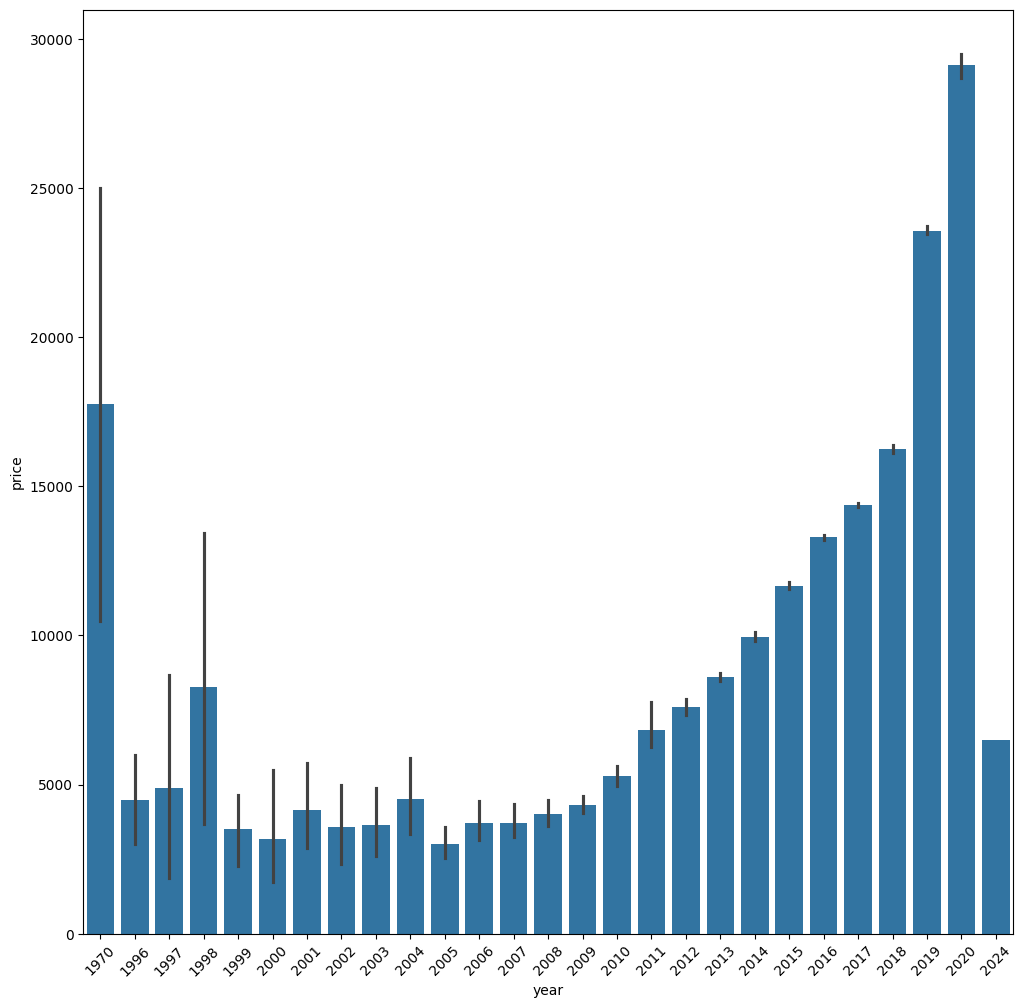

In [23]:
plt.figure(figsize= (12,12))
sns.barplot(data = df, x = 'year', y = 'price')
plt.xticks(rotation = 45)
plt.show()

In [24]:
df.groupby(['model'])['price'].mean().reset_index().sort_values(by = 'model')

,model,price
0,1 Series,15810.910805
1,2 Series,19445.345118
2,3 Series,19851.691044
3,4 Series,22441.975659
4,5 Series,22496.283539
...,...,...
191,180,10799.000000
192,200,19495.000000
193,220,19995.000000
194,230,4500.000000


In [25]:
df.groupby(['transmission'])['price'].mean().reset_index().sort_values(by = 'transmission')

,transmission,price
0,Automatic,21512.202512
1,Manual,12076.615635
2,Other,16219.111111
3,Semi-Auto,24235.214029


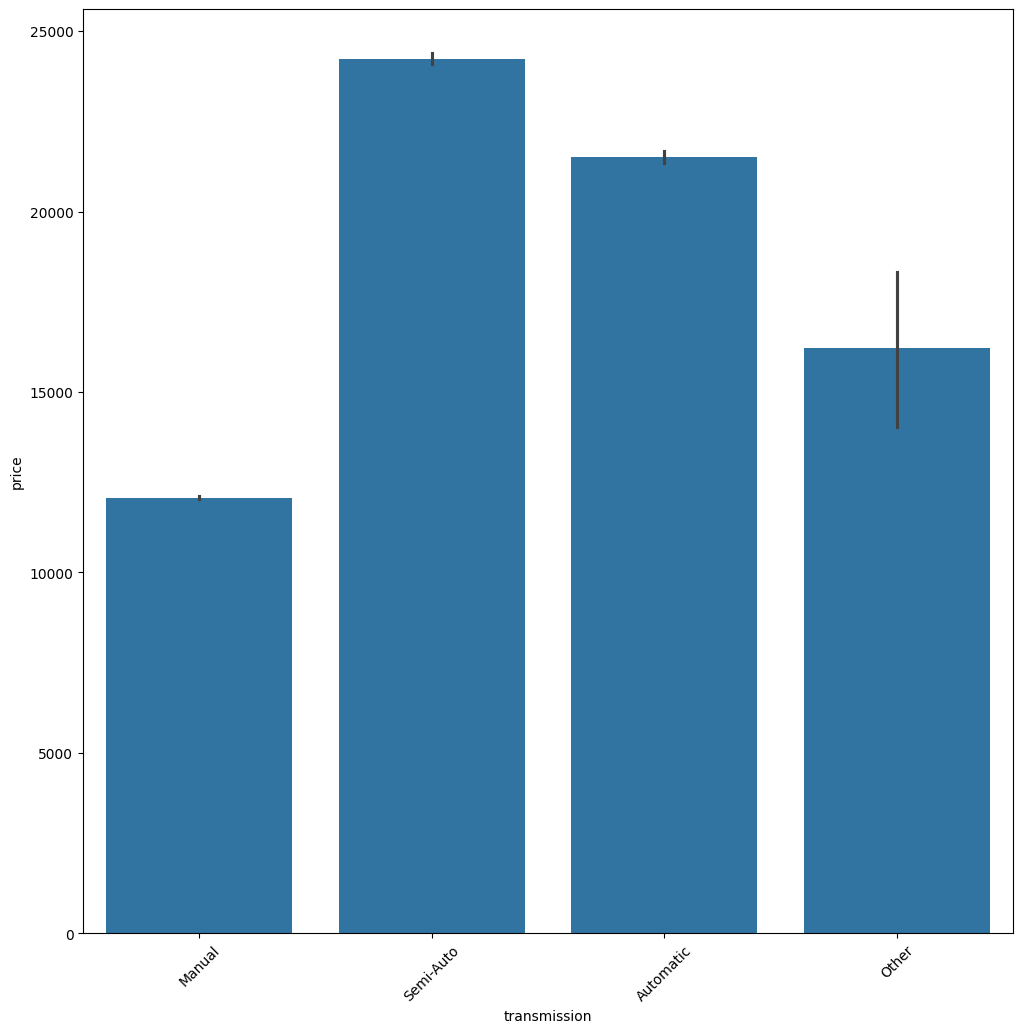

In [26]:
plt.figure(figsize= (12,12))
sns.barplot(data = df, x = 'transmission', y = 'price')
plt.xticks(rotation = 45)
plt.show()

   fuelType         price
0    Diesel  19306.870704
1  Electric  16645.333333
2    Hybrid  19252.851585
3     Other  17458.768293
4    Petrol  14733.011133


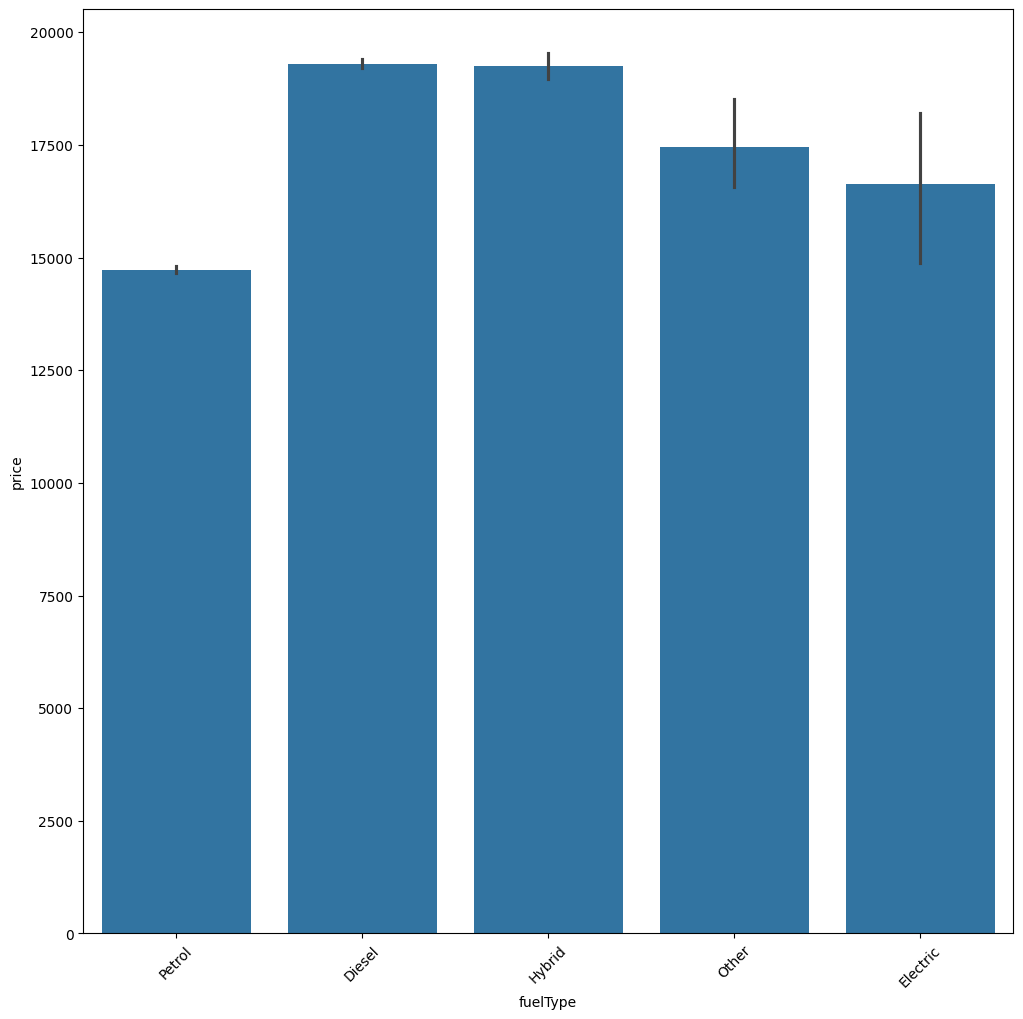

In [27]:
print(df.groupby(['fuelType'])['price'].mean().reset_index().sort_values(by = 'fuelType'))
plt.figure(figsize= (12,12))
sns.barplot(data = df, x = 'fuelType', y = 'price')
plt.xticks(rotation = 45)
plt.show()


  Manufacturer         price
0         Audi  22853.956081
1          BMW  22692.888691
2         ford  12269.779238
3       hyundi  12727.809384
4         merc  24636.426361
5        skoda  14284.802683
6       toyota  12529.799074
7     vauxhall  10314.259541
8   volkswagen  16807.898073


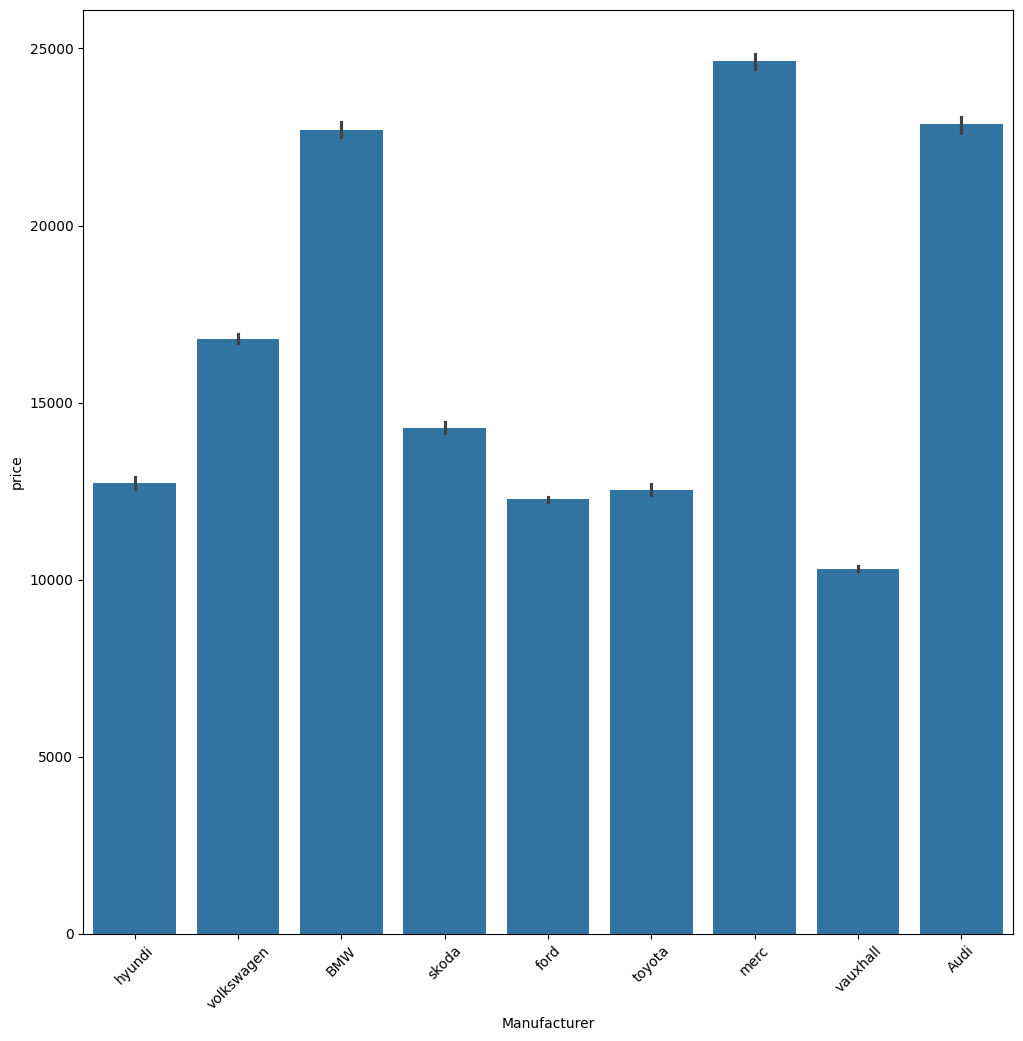

In [28]:
print(df.groupby(['Manufacturer'])['price'].mean().reset_index().sort_values(by = 'Manufacturer'))
plt.figure(figsize= (12,12))
sns.barplot(data = df, x = 'Manufacturer', y = 'price')
plt.xticks(rotation = 45)
plt.show()

In [29]:
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [30]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df['model_encoded'] = label_encoder.fit_transform(df['model'])

model_lm = ols('model_encoded ~ price', data=df).fit()

table = sm.stats.anova_lm(model_lm, typ=2)
print(table)

                sum_sq       df          F        PR(>F)
price     6.042257e+05      1.0  219.04471  1.653787e-49
Residual  2.695290e+08  97710.0        NaN           NaN


In [31]:
model_df = df.copy()

model_df = model_df.drop(['model_encoded', 'model'], axis = 1)

model_df

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
0,2017,7495,Manual,11630,Petrol,145,60.1,1.0,hyundi
1,2017,10989,Manual,9200,Petrol,145,58.9,1.0,volkswagen
2,2019,27990,Semi-Auto,1614,Diesel,145,49.6,2.0,BMW
3,2017,12495,Manual,30960,Diesel,150,62.8,2.0,skoda
4,2017,7999,Manual,19353,Petrol,125,54.3,1.2,ford
...,...,...,...,...,...,...,...,...,...
97707,2017,10447,Automatic,8337,Petrol,145,54.3,1.0,ford
97708,2014,14995,Manual,25372,Diesel,30,61.4,2.0,BMW
97709,2017,8950,Manual,19910,Petrol,125,54.3,1.2,ford
97710,2017,10700,Automatic,24468,Petrol,125,50.4,1.4,vauxhall


In [32]:
le = LabelEncoder()
for column in model_df.select_dtypes(include = 'object').columns:
    model_df[column] = le.fit_transform(model_df[column])

model_df

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
0,2017,7495,1,11630,4,145,60.1,1.0,3
1,2017,10989,1,9200,4,145,58.9,1.0,8
2,2019,27990,3,1614,0,145,49.6,2.0,1
3,2017,12495,1,30960,0,150,62.8,2.0,5
4,2017,7999,1,19353,4,125,54.3,1.2,2
...,...,...,...,...,...,...,...,...,...
97707,2017,10447,0,8337,4,145,54.3,1.0,2
97708,2014,14995,1,25372,0,30,61.4,2.0,1
97709,2017,8950,1,19910,4,125,54.3,1.2,2
97710,2017,10700,0,24468,4,125,50.4,1.4,7


<Axes: >

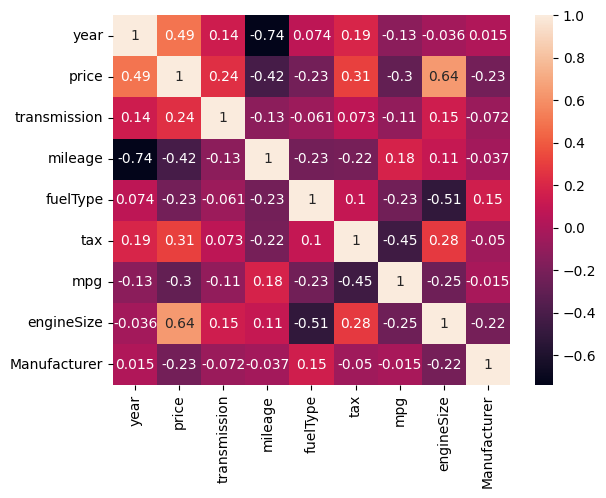

In [33]:
sns.heatmap(model_df.corr(), annot=True)

<Axes: xlabel='engineSize', ylabel='price'>

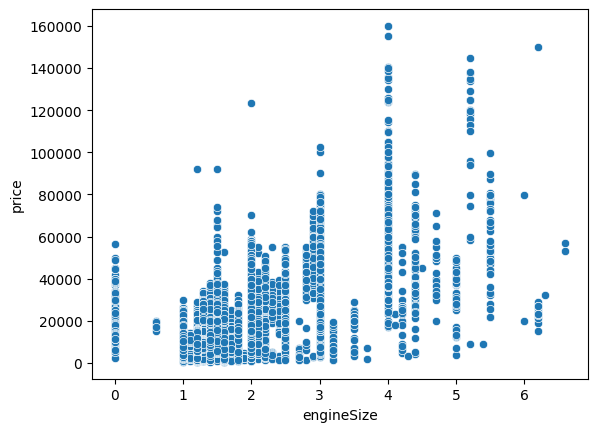

In [34]:
sns.scatterplot(model_df, x = 'engineSize', y = 'price')

<Axes: xlabel='year', ylabel='price'>

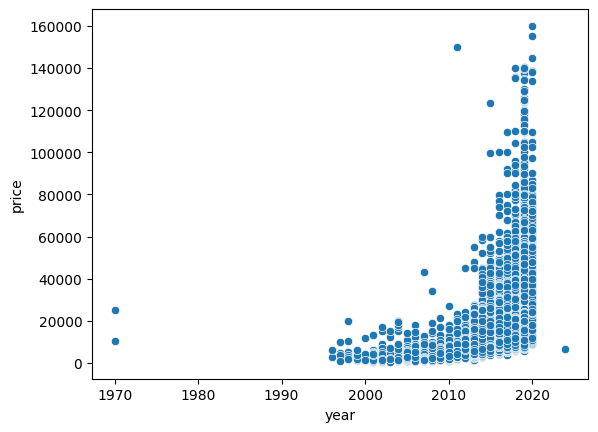

In [35]:
sns.scatterplot(model_df, x = 'year', y = 'price')

In [36]:
df.drop('model', axis = 1, inplace=True)

In [37]:
df['year'] = model_df['year'].astype('object')
model_df['year'] = model_df['year'].astype('object')

categorical_columns = df.select_dtypes(include = 'object').columns.to_list()

categorical_columns

['year', 'transmission', 'fuelType', 'Manufacturer']

In [38]:
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder(sparse_output=False)
onehot_data = onehot.fit_transform(model_df[categorical_columns])
one_hot_df = pd.DataFrame(onehot_data, columns = onehot.get_feature_names_out())
one_hot_df

,year_1970,year_1996,year_1997,year_1998,year_1999,year_2000,year_2001,year_2002,year_2003,year_2004,...,fuelType_4,Manufacturer_0,Manufacturer_1,Manufacturer_2,Manufacturer_3,Manufacturer_4,Manufacturer_5,Manufacturer_6,Manufacturer_7,Manufacturer_8
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97707,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
97708,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97709,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
97710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [39]:
model_df = pd.concat([one_hot_df, df.select_dtypes(exclude = 'object')], axis = 1)
model_df

,year_1970,year_1996,year_1997,year_1998,year_1999,year_2000,year_2001,year_2002,year_2003,year_2004,...,Manufacturer_5,Manufacturer_6,Manufacturer_7,Manufacturer_8,price,mileage,tax,mpg,engineSize,model_encoded
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,7495,11630,145,60.1,1.0,81
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,10989,9200,145,58.9,1.0,115
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,27990,1614,145,49.6,2.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,12495,30960,150,62.8,2.0,184
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,7999,19353,125,54.3,1.2,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97707,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10447,8337,145,54.3,1.0,60
97708,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,14995,25372,30,61.4,2.0,2
97709,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,8950,19910,125,54.3,1.2,60
97710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,10700,24468,125,50.4,1.4,25


In [40]:
model_df.isnull().sum()

year_1970         0
year_1996         0
year_1997         0
year_1998         0
year_1999         0
year_2000         0
year_2001         0
year_2002         0
year_2003         0
year_2004         0
year_2005         0
year_2006         0
year_2007         0
year_2008         0
year_2009         0
year_2010         0
year_2011         0
year_2012         0
year_2013         0
year_2014         0
year_2015         0
year_2016         0
year_2017         0
year_2018         0
year_2019         0
year_2020         0
year_2024         0
transmission_0    0
transmission_1    0
transmission_2    0
transmission_3    0
fuelType_0        0
fuelType_1        0
fuelType_2        0
fuelType_3        0
fuelType_4        0
Manufacturer_0    0
Manufacturer_1    0
Manufacturer_2    0
Manufacturer_3    0
Manufacturer_4    0
Manufacturer_5    0
Manufacturer_6    0
Manufacturer_7    0
Manufacturer_8    0
price             0
mileage           0
tax               0
mpg               0
engineSize        0


In [41]:
model_df.columns

Index(['year_1970', 'year_1996', 'year_1997', 'year_1998', 'year_1999',
       'year_2000', 'year_2001', 'year_2002', 'year_2003', 'year_2004',
       'year_2005', 'year_2006', 'year_2007', 'year_2008', 'year_2009',
       'year_2010', 'year_2011', 'year_2012', 'year_2013', 'year_2014',
       'year_2015', 'year_2016', 'year_2017', 'year_2018', 'year_2019',
       'year_2020', 'year_2024', 'transmission_0', 'transmission_1',
       'transmission_2', 'transmission_3', 'fuelType_0', 'fuelType_1',
       'fuelType_2', 'fuelType_3', 'fuelType_4', 'Manufacturer_0',
       'Manufacturer_1', 'Manufacturer_2', 'Manufacturer_3', 'Manufacturer_4',
       'Manufacturer_5', 'Manufacturer_6', 'Manufacturer_7', 'Manufacturer_8',
       'price', 'mileage', 'tax', 'mpg', 'engineSize', 'model_encoded'],
      dtype='object')

In [42]:
model_df.drop('model_encoded', axis = 1, inplace = True)

In [43]:
x = model_df.drop('price', axis = 1)
y = model_df['price']

In [44]:
from sklearn.preprocessing import StandardScaler
numerical_columns = [ 'mileage', 'tax', 'mpg', 'engineSize']
for i in numerical_columns:
    scaler = StandardScaler()
    x[i] = scaler.fit_transform(x[[i]])
x


,year_1970,year_1996,year_1997,year_1998,year_1999,year_2000,year_2001,year_2002,year_2003,year_2004,...,Manufacturer_3,Manufacturer_4,Manufacturer_5,Manufacturer_6,Manufacturer_7,Manufacturer_8,mileage,tax,mpg,engineSize
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,-0.550287,0.392342,0.302466,-1.190382
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,-0.665668,0.392342,0.228308,-1.190382
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.025863,0.392342,-0.346420,0.599900
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.367533,0.471260,0.469322,0.599900
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.183587,0.076670,-0.055966,-0.832326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97707,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.706644,0.392342,-0.055966,-1.190382
97708,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.102205,-1.422771,0.382804,0.599900
97709,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.157139,0.076670,-0.055966,-0.832326
97710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.059282,0.076670,-0.296981,-0.474269


In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

print(x_train.shape, '\n', y_train.shape)

(78169, 49) 
 (78169,)


In [87]:
class sklearn_model_build():
    def __init__(self, clf, params, x_train, y_train, x_test, y_test):
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test
        self.clf = clf
        self.params = params
        self.grid_search = GridSearchCV(estimator=self.clf, param_grid=self.params, scoring='neg_root_mean_squared_error')
    def perform_grid_search(self):
        self.grid_search.fit(x_train, y_train)
        best_score = self.grid_search.best_score_
        best_params = self.grid_search.best_params_
        print('Best score:', best_score, '\n', 'Best Parameters:', best_params, '\n')
    def train_model(self):
        self.best_model = self.grid_search.best_estimator_
        self.best_model.fit(self.x_train, self.y_train)
        train_predictions = self.best_model.predict(self.x_train)
        r2_score_train = r2_score(self.y_train, train_predictions)
        root_mean_squared_error_train = np.sqrt(mean_squared_error(self.y_train, train_predictions))
        print('r2 Score using training data:', r2_score_train, '\n', 'root mean squared error using training data:', root_mean_squared_error_train)
    def test_model(self):
        test_predictions = self.best_model.predict(self.x_test)
        r2_score_test = r2_score(self.y_test, test_predictions)
        root_mean_squared_error_test = np.sqrt(mean_squared_error(self.y_test, test_predictions))
        print('r2 Score using testing data:', r2_score_test, '\n', 'root mean squared error using testing data:', root_mean_squared_error_test)

In [84]:
params_lr = {'fit_intercept': [True, False]}
param_svm = {'C': [0.001, 0.01, 5, 10, 50, 100]}
param_knn = {'n_neighbors':[2,4,8,16]}
param_rf = {'n_estimators': [300, 500, 800], 'max_depth': [5,8,15]}
param_xg = {'eta': [0.01, 0.015, 0.025, 0.025, 0.05, 0.1], 'gamma': [0.05, 0.3, 0.5, 0.7, 0.9], 'min_child_weight': [1,3,5,7]}

In [90]:
base_lr = sklearn_model_build(clf = LinearRegression(), params = params_lr, x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test)
base_lr.perform_grid_search()

Best score: -314762485292.28033 
 Best Parameters: {'fit_intercept': True} 



In [91]:
base_lr.train_model()

r2 Score using training data: 0.7848836896512232 
 root mean squared error using training data: 4600.963836652935


In [92]:
base_lr.test_model()

r2 Score using testing data: 0.7947695597093152 
 root mean squared error using testing data: 4376.0604186107885


In [93]:
base_knn = sklearn_model_build(clf = KNeighborsRegressor(), params = param_knn, x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test)
base_knn.perform_grid_search()

Best score: -2769.69690461745 
 Best Parameters: {'n_neighbors': 4} 



In [94]:
base_knn.train_model()

r2 Score using training data: 0.9566205001270538 
 root mean squared error using training data: 2066.114663340511


In [95]:
base_knn.test_model()

r2 Score using testing data: 0.9286121934844732 
 root mean squared error using testing data: 2580.9193876951513


In [96]:
base_rf= sklearn_model_build(clf = RandomForestRegressor(), params = param_rf, x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test)
base_rf.perform_grid_search()

Best score: -2476.1189905768997 
 Best Parameters: {'max_depth': 15, 'n_estimators': 500} 



In [97]:
base_rf.train_model()

r2 Score using training data: 0.9707693324027744 
 root mean squared error using training data: 1696.0221379190527


In [98]:
base_rf.test_model()

r2 Score using testing data: 0.941625269343435 
 root mean squared error using testing data: 2333.8603505852284


In [99]:
base_xg= sklearn_model_build(clf = XGBRegressor(), params = param_xg, x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test)
base_xg.perform_grid_search()

Best score: -2741.5465827417684 
 Best Parameters: {'eta': 0.1, 'gamma': 0.05, 'min_child_weight': 3} 



In [100]:
base_xg.train_model()

r2 Score using training data: 0.9328327544643901 
 root mean squared error using training data: 2570.9339477448875


In [101]:
base_xg.test_model()

r2 Score using testing data: 0.9234062545382052 
 root mean squared error using testing data: 2673.3700276778436


In [102]:
base_svm= sklearn_model_build(clf = SVR(), params = param_svm, x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test)
base_svm.perform_grid_search()

Best score: -4292.5510336279085 
 Best Parameters: {'C': 100} 



In [103]:
base_svm.train_model()

r2 Score using training data: 0.8224409362816961 
 root mean squared error using training data: 4180.070174689068


In [104]:
base_svm.test_model()

r2 Score using testing data: 0.8526702572646292 
 root mean squared error using testing data: 3707.7260334420794


In [62]:
x_train.shape[1]

49

In [73]:
import tensorflow

In [74]:
inputs1 = Input(shape = (x_train.shape[1], ))
x = Dense(100, activation = 'relu')(inputs1)
x = Dense(50, activation = 'relu')(x)
x = Dense(10, activation = 'relu')(x)
output1 = Dense(1)(x)

model_1 = Model(inputs = inputs1, outputs = output1)

model_1.compile(loss = 'mse', optimizer = 'adam', metrics = [tensorflow.keras.metrics.RootMeanSquaredError()])

In [75]:
model_1.fit(x_train, y_train, epochs = 50, validation_data=(x_test, y_test), callbacks=[EarlyStopping(patience=10, monitor='val_loss', min_delta=.001)])

Epoch 1/50
2443/2443 [==============================] - 2s 663us/step - loss: 57413008.0000 - root_mean_squared_error: 7577.1372 - val_loss: 16298563.0000 - val_root_mean_squared_error: 4037.1479
Epoch 2/50
2443/2443 [==============================] - 2s 669us/step - loss: 16484072.0000 - root_mean_squared_error: 4060.0581 - val_loss: 13637209.0000 - val_root_mean_squared_error: 3692.8591
Epoch 3/50
2443/2443 [==============================] - 2s 645us/step - loss: 14399980.0000 - root_mean_squared_error: 3794.7305 - val_loss: 12305989.0000 - val_root_mean_squared_error: 3507.9893
Epoch 4/50
2443/2443 [==============================] - 1s 610us/step - loss: 13267840.0000 - root_mean_squared_error: 3642.5046 - val_loss: 11676433.0000 - val_root_mean_squared_error: 3417.0796
Epoch 5/50
2443/2443 [==============================] - 2s 655us/step - loss: 12663456.0000 - root_mean_squared_error: 3558.5750 - val_loss: 11238333.0000 - val_root_mean_squared_error: 3352.3623
Epoch 6/50
2443/2443

In [77]:
inputs2 = Input(shape = (x_train.shape[1], ))
x2 = Dense(400, activation = 'relu')(inputs2)
x2 = Dense(300, activation = 'relu')(x2)
x2 = Dense(200, activation = 'relu')(x2)
x2 = Dense(200, activation = 'relu')(x2)
x2 = Dense(50, activation = 'relu')(x2)
x2 = Dense(10, activation = 'relu')(x2)
output2 = Dense(1)(x2)

model_2 = Model(inputs = inputs2, outputs = output2)

model_2.compile(loss = 'mse', optimizer = 'adam', metrics = [tensorflow.keras.metrics.RootMeanSquaredError()])

In [78]:
model_2.fit(x_train, y_train, epochs = 50, validation_data=(x_test, y_test), callbacks=[EarlyStopping(patience=10, monitor='val_loss', min_delta=.001, restore_best_weights=True)])

Epoch 1/50
2443/2443 [==============================] - 5s 2ms/step - loss: 20975714.0000 - root_mean_squared_error: 4579.9253 - val_loss: 12527530.0000 - val_root_mean_squared_error: 3539.4250
Epoch 2/50
2443/2443 [==============================] - 4s 2ms/step - loss: 11969792.0000 - root_mean_squared_error: 3459.7388 - val_loss: 9830195.0000 - val_root_mean_squared_error: 3135.3142
Epoch 3/50
2443/2443 [==============================] - 4s 2ms/step - loss: 11171355.0000 - root_mean_squared_error: 3342.3577 - val_loss: 9021181.0000 - val_root_mean_squared_error: 3003.5281
Epoch 4/50
2443/2443 [==============================] - 4s 2ms/step - loss: 10633621.0000 - root_mean_squared_error: 3260.9233 - val_loss: 9260052.0000 - val_root_mean_squared_error: 3043.0334
Epoch 5/50
2443/2443 [==============================] - 4s 2ms/step - loss: 10297984.0000 - root_mean_squared_error: 3209.0471 - val_loss: 8886835.0000 - val_root_mean_squared_error: 2981.0796
Epoch 6/50
2443/2443 [============

In [79]:
inputs3 = Input(shape = (x_train.shape[1], ))
x3 = Dense(600, activation = 'relu')(inputs3)
x3 = Dense(500, activation = 'relu')(x3)
x3 = Dense(400, activation = 'relu')(x3)
x3 = Dense(300, activation = 'relu')(x3)
x3 = Dense(300, activation = 'relu')(x3)
x3 = Dense(200, activation = 'relu')(x3)
x3 = Dense(100, activation = 'relu')(x3)
x3 = Dense(50, activation = 'relu')(x3)
x3 = Dense(10, activation = 'relu')(x3)
output3 = Dense(1)(x3)

model_3 = Model(inputs = inputs3, outputs = output3)

model_3.compile(loss = 'mse', optimizer = 'adam', metrics = [tensorflow.keras.metrics.RootMeanSquaredError()])

model_3.fit(x_train, y_train, epochs = 200, validation_data=(x_test, y_test), callbacks=[EarlyStopping(patience=10, monitor='val_loss', min_delta=.001, restore_best_weights=True)])

Epoch 1/200
2443/2443 [==============================] - 16s 6ms/step - loss: 18499646.0000 - root_mean_squared_error: 4301.1216 - val_loss: 13330698.0000 - val_root_mean_squared_error: 3651.1228
Epoch 2/200
2443/2443 [==============================] - 15s 6ms/step - loss: 12653643.0000 - root_mean_squared_error: 3557.1960 - val_loss: 20077328.0000 - val_root_mean_squared_error: 4480.7729
Epoch 3/200
2443/2443 [==============================] - 15s 6ms/step - loss: 11422902.0000 - root_mean_squared_error: 3379.7783 - val_loss: 11422140.0000 - val_root_mean_squared_error: 3379.6658
Epoch 4/200
2443/2443 [==============================] - 16s 7ms/step - loss: 10877369.0000 - root_mean_squared_error: 3298.0857 - val_loss: 8245888.5000 - val_root_mean_squared_error: 2871.5654
Epoch 5/200
2443/2443 [==============================] - 16s 7ms/step - loss: 10012100.0000 - root_mean_squared_error: 3164.1902 - val_loss: 7878815.0000 - val_root_mean_squared_error: 2806.9226
Epoch 6/200
2443/2443 

In [82]:
ann_prediction = model_3.predict(x_test)
ann_r2score = r2_score(y_test, ann_prediction)
ann_rmse = np.sqrt(mean_squared_error(y_test, ann_prediction))
print('Best r2 Score:', ann_r2score, '\n', 'Best rmse score:', ann_rmse)

611/611 [==============================] - 1s 1ms/step
Best r2 Score: 0.9360738092867651 
 Best rmse score: 2442.315884864505


In [182]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.covariance import EllipticEnvelope
def outlier_detect(outlier_algo, x_train, y_train):
    predictions = outlier_algo.fit_predict(x_train)
    
    not_outliers = predictions != -1 
    new_x_train, new_y_train = x_train[not_outliers], y_train[not_outliers]
    number_of_rows_removed = x_train.shape[0] - new_x_train.shape[0]

    return new_x_train, new_y_train, number_of_rows_removed 

In [109]:
print(x_train.shape, y_train.shape)


(78169, 49) (78169,)


In [183]:
local_x_train, local_y_train, local_nor = outlier_detect(LocalOutlierFactor(), x_train=x_train, y_train=y_train)

In [140]:
local_lr = sklearn_model_build(LinearRegression(), params=params_lr, x_train=local_x_train, y_train = local_y_train, x_test=x_test, y_test = y_test)
local_lr.perform_grid_search()
local_lr.train_model()
local_lr.test_model()
print('\n', 'number of observations removed', local_nor)

Best score: -314762485292.28033 
 Best Parameters: {'fit_intercept': True} 

r2 Score using training data: 0.7920298570910214 
 root mean squared error using training data: 4456.9833853765895
r2 Score using testing data: 0.7948431194917736 
 root mean squared error using testing data: 4375.276102937168

 number of observations removed 7349


In [142]:
local_knn = sklearn_model_build(KNeighborsRegressor(), params=param_knn, x_train=local_x_train, y_train = local_y_train, x_test=x_test, y_test = y_test)
local_knn.perform_grid_search()
local_knn.train_model()
local_knn.test_model()
print('\n', 'number of observations removed', local_nor)

Best score: -2769.69690461745 
 Best Parameters: {'n_neighbors': 4} 

r2 Score using training data: 0.9595470307532602 
 root mean squared error using training data: 1965.6931406139395
r2 Score using testing data: 0.9186677337881145 
 root mean squared error using testing data: 2754.823999507231

 number of observations removed 7349


In [143]:
local_rf = sklearn_model_build(RandomForestRegressor(), params=param_rf, x_train=local_x_train, y_train = local_y_train, x_test=x_test, y_test = y_test)
local_rf.perform_grid_search()
local_rf.train_model()
local_rf.test_model()
print('\n', 'number of observations removed', local_nor)

Best score: -2475.5280188648317 
 Best Parameters: {'max_depth': 15, 'n_estimators': 800} 

r2 Score using training data: 0.9721703319858734 
 root mean squared error using training data: 1630.4013745372977
r2 Score using testing data: 0.9320329899757721 
 root mean squared error using testing data: 2518.3234155529135

 number of observations removed 7349


In [144]:
local_xg = sklearn_model_build(XGBRegressor(), params=param_xg, x_train=local_x_train, y_train = local_y_train, x_test=x_test, y_test = y_test)
local_xg.perform_grid_search()
local_xg.train_model()
local_xg.test_model()
print('\n', 'number of observations removed', local_nor)

Best score: -2741.5465827417684 
 Best Parameters: {'eta': 0.1, 'gamma': 0.05, 'min_child_weight': 3} 

r2 Score using training data: 0.9352819242167821 
 root mean squared error using training data: 2486.2987872082344
r2 Score using testing data: 0.9192702698890629 
 root mean squared error using testing data: 2744.600710123281

 number of observations removed 7349


In [145]:
model_3.fit(local_x_train, local_y_train, epochs = 200, validation_data=(x_test, y_test), callbacks=[EarlyStopping(patience=10, monitor='val_loss', min_delta=.001, restore_best_weights=True)])

Epoch 1/200
2214/2214 [==============================] - 16s 7ms/step - loss: 5877798.0000 - root_mean_squared_error: 2424.4170 - val_loss: 6301835.5000 - val_root_mean_squared_error: 2510.3457
Epoch 2/200
2214/2214 [==============================] - 16s 7ms/step - loss: 5594756.5000 - root_mean_squared_error: 2365.3237 - val_loss: 6140899.5000 - val_root_mean_squared_error: 2478.0837
Epoch 3/200
2214/2214 [==============================] - 16s 7ms/step - loss: 5607817.5000 - root_mean_squared_error: 2368.0830 - val_loss: 5940674.0000 - val_root_mean_squared_error: 2437.3499
Epoch 4/200
2214/2214 [==============================] - 16s 7ms/step - loss: 5619427.0000 - root_mean_squared_error: 2370.5330 - val_loss: 6903626.5000 - val_root_mean_squared_error: 2627.4753
Epoch 5/200
2214/2214 [==============================] - 16s 7ms/step - loss: 5576361.5000 - root_mean_squared_error: 2361.4321 - val_loss: 6792006.0000 - val_root_mean_squared_error: 2606.1477
Epoch 6/200
2214/2214 [=======

In [175]:
local_ann_prediction = model_3.predict(x_test)
local_ann_r2score = r2_score(y_test, local_ann_prediction)
local_ann_rmse = np.sqrt(mean_squared_error(y_test, local_ann_prediction))
print('Best r2 Score:', local_ann_r2score, '\n', 'Best rmse score:', local_ann_rmse)
print('number of records removed:', local_nor)

611/611 [==============================] - 1s 1ms/step
Best r2 Score: 0.9363335298016335 
 Best rmse score: 2437.3494921744605
number of records removed: 7349


In [123]:
iso_x_train, iso_y_train, iso_nor = outlier_detect(IsolationForest(), x_train=x_train, y_train=y_train)

In [124]:
iso_lr = sklearn_model_build(LinearRegression(), params=params_lr, x_train=iso_x_train, y_train = iso_y_train, x_test=x_test, y_test = y_test)
iso_lr.perform_grid_search()
iso_lr.train_model()
iso_lr.test_model()
print('\n', 'number of observations removed', iso_nor)

Best score: -314762485292.28033 
 Best Parameters: {'fit_intercept': True} 

r2 Score using training data: 0.8085317850598095 
 root mean squared error using training data: 4221.745481013432
r2 Score using testing data: 0.7567681156103058 
 root mean squared error using testing data: 4764.010097239297

 number of observations removed 3385


In [125]:
iso_knn = sklearn_model_build(KNeighborsRegressor(), params=param_knn, x_train=iso_x_train, y_train = iso_y_train, x_test=x_test, y_test = y_test)
iso_knn.perform_grid_search()
iso_knn.train_model()
iso_knn.test_model()
print('\n', 'number of observations removed', iso_nor)

Best score: -2769.69690461745 
 Best Parameters: {'n_neighbors': 4} 

r2 Score using training data: 0.9587097376757223 
 root mean squared error using training data: 1960.5030578139454
r2 Score using testing data: 0.9126024906437136 
 root mean squared error using testing data: 2855.6958423659103

 number of observations removed 3385


In [126]:
iso_rf = sklearn_model_build(RandomForestRegressor(), params=param_rf, x_train=iso_x_train, y_train = iso_y_train, x_test=x_test, y_test = y_test)
iso_rf.perform_grid_search()
iso_rf.train_model()
iso_rf.test_model()
print('\n', 'number of observations removed', iso_nor)

Best score: -2473.077154513253 
 Best Parameters: {'max_depth': 15, 'n_estimators': 800} 

r2 Score using training data: 0.9714523978900115 
 root mean squared error using training data: 1630.1535741162943
r2 Score using testing data: 0.9270201873540734 
 root mean squared error using testing data: 2609.539007733068

 number of observations removed 3385


In [127]:
iso_xg = sklearn_model_build(XGBRegressor(), params=param_xg, x_train=iso_x_train, y_train = iso_y_train, x_test=x_test, y_test = y_test)
iso_xg.perform_grid_search()
iso_xg.train_model()
iso_xg.test_model()
print('\n', 'number of observations removed', iso_nor)

Best score: -2741.5465827417684 
 Best Parameters: {'eta': 0.1, 'gamma': 0.05, 'min_child_weight': 3} 

r2 Score using training data: 0.9352253786319104 
 root mean squared error using training data: 2455.5350892519564
r2 Score using testing data: 0.9189348081752731 
 root mean squared error using testing data: 2750.297211078821

 number of observations removed 3385


In [128]:
model_3.fit(iso_x_train, iso_y_train, epochs = 200, validation_data=(x_test, y_test), callbacks=[EarlyStopping(patience=10, monitor='val_loss', min_delta=.001, restore_best_weights=True)])

Epoch 1/200
2337/2337 [==============================] - 17s 7ms/step - loss: 5812427.0000 - root_mean_squared_error: 2410.8975 - val_loss: 6317469.0000 - val_root_mean_squared_error: 2513.4575
Epoch 2/200
2337/2337 [==============================] - 17s 7ms/step - loss: 5615476.0000 - root_mean_squared_error: 2369.6995 - val_loss: 6067397.5000 - val_root_mean_squared_error: 2463.2087
Epoch 3/200
2337/2337 [==============================] - 17s 7ms/step - loss: 5709528.0000 - root_mean_squared_error: 2389.4619 - val_loss: 6065310.5000 - val_root_mean_squared_error: 2462.7852
Epoch 4/200
2337/2337 [==============================] - 17s 7ms/step - loss: 5600413.0000 - root_mean_squared_error: 2366.5193 - val_loss: 6299273.5000 - val_root_mean_squared_error: 2509.8354
Epoch 5/200
2337/2337 [==============================] - 17s 7ms/step - loss: 5620046.0000 - root_mean_squared_error: 2370.6636 - val_loss: 6510228.5000 - val_root_mean_squared_error: 2551.5149
Epoch 6/200
2337/2337 [=======

In [131]:
iso_ann_prediction = model_3.predict(x_test)
iso_ann_r2score = r2_score(y_test, iso_ann_prediction)
iso_ann_rmse = np.sqrt(mean_squared_error(y_test, iso_ann_prediction))
print('Best r2 Score:', iso_ann_r2score, '\n', 'Best rmse score:', iso_ann_rmse)
print('number of records removed:', iso_nor)

611/611 [==============================] - 1s 2ms/step
Best r2 Score: 0.9349977656397688 
 Best rmse score: 2462.7853622070215
number of records removed: 3385


In [130]:
ee_x_train, ee_y_train, ee_nor = outlier_detect(EllipticEnvelope(), x_train=x_train, y_train=y_train)

c:\Users\dgmur\python\lib\site-packages\sklearn\covariance\_robust_covariance.py:747: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(


In [132]:
ee_lr = sklearn_model_build(LinearRegression(), params=params_lr, x_train=ee_x_train, y_train = ee_y_train, x_test=x_test, y_test = y_test)
ee_lr.perform_grid_search()
ee_lr.train_model()
ee_lr.test_model()
print('\n', 'number of observations removed', ee_nor)

Best score: -314762485292.28033 
 Best Parameters: {'fit_intercept': True} 

r2 Score using training data: 0.8267943873384694 
 root mean squared error using training data: 3710.21348934115
r2 Score using testing data: -9.028954368927193e+18 
 root mean squared error using testing data: 29025596269230.734

 number of observations removed 7817


In [133]:
ee_knn = sklearn_model_build(KNeighborsRegressor(), params=param_knn, x_train=ee_x_train, y_train = ee_y_train, x_test=x_test, y_test = y_test)
ee_knn.perform_grid_search()
ee_knn.train_model()
ee_knn.test_model()
print('\n', 'number of observations removed', ee_nor)

Best score: -2769.69690461745 
 Best Parameters: {'n_neighbors': 4} 

r2 Score using training data: 0.9603737710011604 
 root mean squared error using training data: 1774.636019308711
r2 Score using testing data: 0.8676001075525606 
 root mean squared error using testing data: 3514.8454796537644

 number of observations removed 7817


In [134]:
ee_rf = sklearn_model_build(RandomForestRegressor(), params=param_rf, x_train=ee_x_train, y_train = ee_y_train, x_test=x_test, y_test = y_test)
ee_rf.perform_grid_search()
ee_rf.train_model()
ee_rf.test_model()
print('\n', 'number of observations removed', ee_nor)

Best score: -2475.607723401813 
 Best Parameters: {'max_depth': 15, 'n_estimators': 800} 

r2 Score using training data: 0.9696199114709904 
 root mean squared error using training data: 1553.8619678683958
r2 Score using testing data: 0.8805160963928479 
 root mean squared error using testing data: 3339.005408199537

 number of observations removed 7817


In [135]:
ee_xg = sklearn_model_build(XGBRegressor(), params=param_xg, x_train=ee_x_train, y_train = ee_y_train, x_test=x_test, y_test = y_test)
ee_xg.perform_grid_search()
ee_xg.train_model()
ee_xg.test_model()
print('\n', 'number of observations removed', ee_nor)

Best score: -2741.5465827417684 
 Best Parameters: {'eta': 0.1, 'gamma': 0.05, 'min_child_weight': 3} 

r2 Score using training data: 0.9369276760164652 
 root mean squared error using training data: 2238.913609515733
r2 Score using testing data: 0.8729379087581999 
 root mean squared error using testing data: 3443.264781300853

 number of observations removed 7817


In [136]:
model_3.fit(ee_x_train, ee_y_train, epochs = 200, validation_data=(x_test, y_test), callbacks=[EarlyStopping(patience=10, monitor='val_loss', min_delta=.001, restore_best_weights=True)])

Epoch 1/200
2199/2199 [==============================] - 15s 7ms/step - loss: 4790867.0000 - root_mean_squared_error: 2188.8049 - val_loss: 6024216.5000 - val_root_mean_squared_error: 2454.4280
Epoch 2/200
2199/2199 [==============================] - 15s 7ms/step - loss: 4816594.5000 - root_mean_squared_error: 2194.6741 - val_loss: 7455923.0000 - val_root_mean_squared_error: 2730.5537
Epoch 3/200
2199/2199 [==============================] - 15s 7ms/step - loss: 4721428.5000 - root_mean_squared_error: 2172.8848 - val_loss: 6083786.0000 - val_root_mean_squared_error: 2466.5332
Epoch 4/200
2199/2199 [==============================] - 16s 7ms/step - loss: 4713642.0000 - root_mean_squared_error: 2171.0923 - val_loss: 6140289.0000 - val_root_mean_squared_error: 2477.9607
Epoch 5/200
2199/2199 [==============================] - 16s 7ms/step - loss: 4683061.5000 - root_mean_squared_error: 2164.0383 - val_loss: 6367369.5000 - val_root_mean_squared_error: 2523.3647
Epoch 6/200
2199/2199 [=======

In [137]:
ee_ann_prediction = model_3.predict(x_test)
ee_ann_r2score = r2_score(y_test, ee_ann_prediction)
ee_ann_rmse = np.sqrt(mean_squared_error(y_test, ee_ann_prediction))
print('Best r2 Score:', ee_ann_r2score, '\n', 'Best rmse score:', ee_ann_rmse)
print('number of records removed:', ee_nor)

611/611 [==============================] - 1s 1ms/step
Best r2 Score: 0.9354381647630813 
 Best rmse score: 2454.428327498695
number of records removed: 7817


# Linear Regression

## Baseline 

In [148]:
base_lr.test_model()

r2 Score using testing data: 0.7947695597093152 
 root mean squared error using testing data: 4376.0604186107885


## Local Outlier Factor

In [153]:
print(local_lr.test_model(), '\n','number of records',local_nor)

r2 Score using testing data: 0.7948431194917736 
 root mean squared error using testing data: 4375.276102937168
None 
 number of records 7349


## Isolation Forest

In [154]:
print(iso_lr.test_model(), '\n','number of records',iso_nor)

r2 Score using testing data: 0.7567681156103058 
 root mean squared error using testing data: 4764.010097239297
None 
 number of records 3385


## Elliptic Envelope

In [155]:
print(ee_lr.test_model(), '\n','number of records',ee_nor)

r2 Score using testing data: -9.028954368927193e+18 
 root mean squared error using testing data: 29025596269230.734
None 
 number of records 7817


# KNN

## Baseline 

In [160]:
base_knn.test_model()

r2 Score using testing data: 0.9286121934844732 
 root mean squared error using testing data: 2580.9193876951513


## Local Outlier Factor

In [156]:
print(local_knn.test_model(), '\n','number of records',local_nor)

r2 Score using testing data: 0.9186677337881145 
 root mean squared error using testing data: 2754.823999507231
None 
 number of records 7349


## Isolation Forest

In [157]:
print(iso_knn.test_model(), '\n','number of records',iso_nor)

r2 Score using testing data: 0.9126024906437136 
 root mean squared error using testing data: 2855.6958423659103
None 
 number of records 3385


## Elliptic Envelope 

In [158]:
print(ee_knn.test_model(), '\n','number of records',ee_nor)

r2 Score using testing data: 0.8676001075525606 
 root mean squared error using testing data: 3514.8454796537644
None 
 number of records 7817


# Random Forest

## Baseline

In [161]:
base_rf.test_model()

r2 Score using testing data: 0.941625269343435 
 root mean squared error using testing data: 2333.8603505852284


## Local Outlier Factor

In [162]:
print(local_rf.test_model(), '\n','number of records',local_nor)

r2 Score using testing data: 0.9320329899757721 
 root mean squared error using testing data: 2518.3234155529135
None 
 number of records 7349


## Isolation Forest

In [163]:
print(iso_rf.test_model(), '\n','number of records',iso_nor)

r2 Score using testing data: 0.9270201873540734 
 root mean squared error using testing data: 2609.539007733068
None 
 number of records 3385


## Elliptic Envelope

In [164]:
print(ee_rf.test_model(), '\n','number of records',ee_nor)

r2 Score using testing data: 0.8805160963928479 
 root mean squared error using testing data: 3339.005408199537
None 
 number of records 7817


# XGBoost

## Baseline

In [166]:
base_xg.test_model()

r2 Score using testing data: 0.9234062545382052 
 root mean squared error using testing data: 2673.3700276778436


## Local Outlier Factor

In [167]:
print(local_xg.test_model(), '\n','number of records',local_nor)

r2 Score using testing data: 0.9192702698890629 
 root mean squared error using testing data: 2744.600710123281
None 
 number of records 7349


## Isolation Forest

In [169]:
print(iso_rf.test_model(), '\n','number of records',iso_nor)

r2 Score using testing data: 0.9270201873540734 
 root mean squared error using testing data: 2609.539007733068
None 
 number of records 3385


## Elliptic Envelope

In [170]:
print(ee_xg.test_model(), '\n','number of records',ee_nor)

r2 Score using testing data: 0.8729379087581999 
 root mean squared error using testing data: 3443.264781300853
None 
 number of records 7817


# ANN

## Baseline

In [172]:
print('Best r2 Score:', ann_r2score, '\n', 'Best rmse score:', ann_rmse)

Best r2 Score: 0.9360738092867651 
 Best rmse score: 2442.315884864505


## Local Outlier Factor 

In [176]:
print('Best r2 Score:', local_ann_r2score, '\n', 'Best rmse score:', local_ann_rmse)
print('number of records removed:', local_nor)

Best r2 Score: 0.9363335298016335 
 Best rmse score: 2437.3494921744605
number of records removed: 7349


## Isolation Forest

In [177]:
print('Best r2 Score:', iso_ann_r2score, '\n', 'Best rmse score:', iso_ann_rmse)
print('number of records removed:', iso_nor)

Best r2 Score: 0.9349977656397688 
 Best rmse score: 2462.7853622070215
number of records removed: 3385


## Elliptic Envelope

In [179]:
print('Best r2 Score:', ee_ann_r2score, '\n', 'Best rmse score:', ee_ann_rmse)
print('number of records removed:', ee_nor)

Best r2 Score: 0.9354381647630813 
 Best rmse score: 2454.428327498695
number of records removed: 7817
